In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from datetime import datetime
from tensorflow.keras.optimizers import Adam

In [2]:
data_train_path = 'Fabrics/train'
data_test_path = 'Fabrics/test'
data_val_path = 'Fabrics/validate'

In [3]:
img_width = 180
img_height =180 

In [4]:
data_train = tf.keras.utils.image_dataset_from_directory(
    data_train_path,
    shuffle=True,
    image_size=(img_width, img_height),
    batch_size=50,
    validation_split=False)
data_cat = data_train.class_names
print("Categories:", data_cat)

Found 2292 files belonging to 22 classes.
Categories: ['Acrylic', 'Artificial_fur', 'Artificial_leather', 'Chenille', 'Corduroy', 'Cotton', 'Crepe', 'Denim', 'Felt', 'Fleece', 'Leather', 'Linen', 'Lut', 'Nylon', 'Polyester', 'Satin', 'Silk', 'Suede', 'Terrycloth', 'Velvet', 'Viscose', 'Wool']


In [5]:
data_val = tf.keras.utils.image_dataset_from_directory(
    data_val_path,
    image_size=(img_height, img_width),
    batch_size=50,
    shuffle=False,
    validation_split=False)

Found 2284 files belonging to 22 classes.


In [6]:
data_test = tf.keras.utils.image_dataset_from_directory(
    data_test_path,
    image_size=(img_height, img_width),
    shuffle=False,
    batch_size=50,
    validation_split=False)

Found 2288 files belonging to 22 classes.


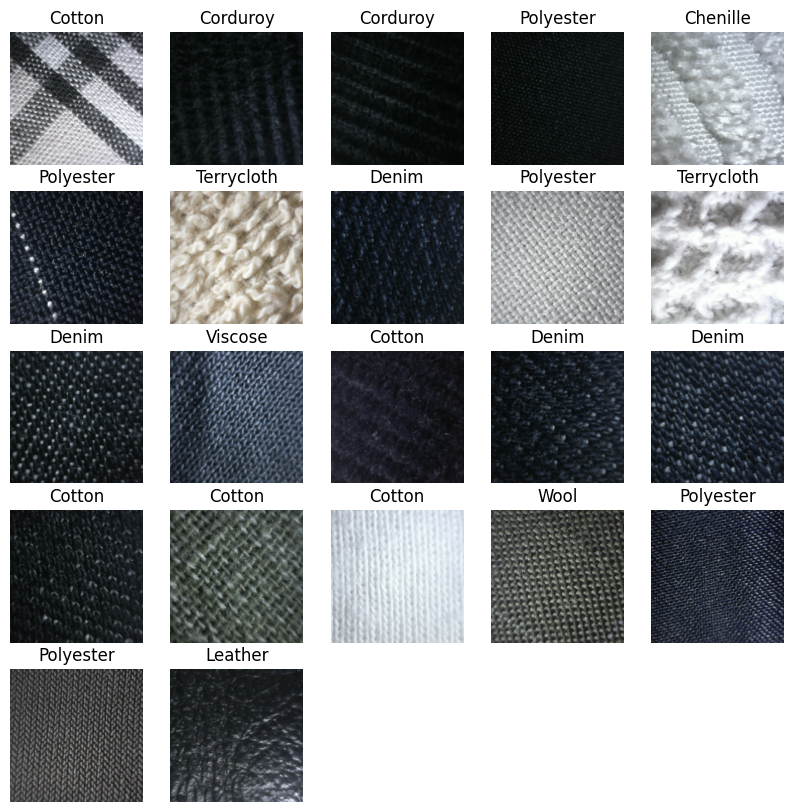

In [7]:
plt.figure(figsize=(10, 10))
for image, labels in data_train.take(1):
    for i in range(22):
        plt.subplot(5, 5, i + 1)
        plt.imshow(image[i].numpy().astype('uint8'))
        plt.title(data_cat[labels[i]])
        plt.axis('off')
plt.show()

In [8]:
model = Sequential([
    layers.Rescaling(1./255),  # Rescaling input images to [0, 1]
    layers.Conv2D(16, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, 3, padding='same',activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(data_cat), activation='softmax')  # Output layer with categories
])

In [9]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
epochs_size = 18
history = model.fit(data_train, validation_data=data_val, epochs=epochs_size)

Epoch 1/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 452ms/step - accuracy: 0.3032 - loss: 2.3297 - val_accuracy: 0.0048 - val_loss: 4.0548
Epoch 2/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 463ms/step - accuracy: 0.3364 - loss: 2.1441 - val_accuracy: 0.0083 - val_loss: 4.5002
Epoch 3/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 475ms/step - accuracy: 0.3868 - loss: 1.9216 - val_accuracy: 0.0140 - val_loss: 4.9753
Epoch 4/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 23s 495ms/step - accuracy: 0.4520 - loss: 1.7098 - val_accuracy: 0.0236 - val_loss: 4.9784
Epoch 5/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 474ms/step - accuracy: 0.4915 - loss: 1.5777 - val_accuracy: 0.0285 - val_loss: 5.9378
Epoch 6/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 450ms/step - accuracy: 0.5368 - loss: 1.4125 - val_accuracy: 0.0639 - val_loss: 5.4814
Epoch 7/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 23s 504ms/step - accuracy: 0.6082 - loss: 1.1960 - val_accuracy: 0.0701 - val_loss: 5.9341
Epoch 8/18
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 475ms/step - accuracy: 0.6484 - loss: 1.0437 - val_accu

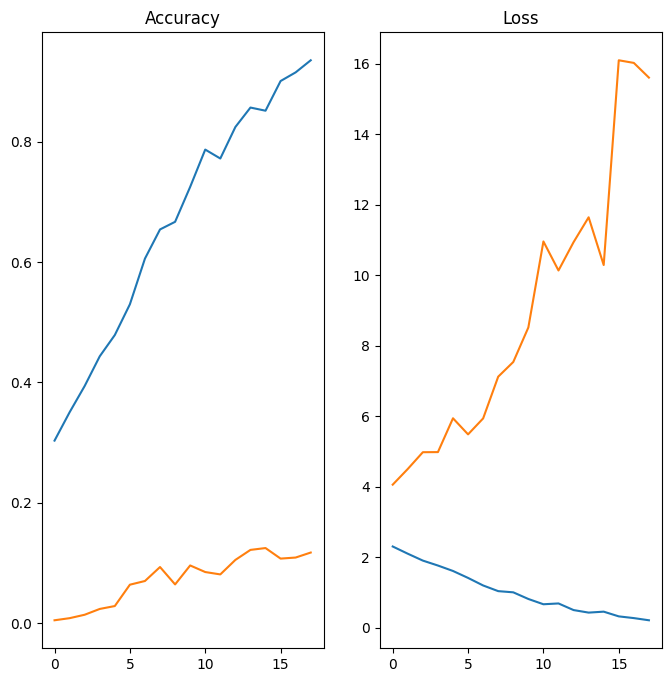

In [12]:
epochs_range = range(epochs_size)
plt.figure(figsize=(8, 8))

plt.subplot(1, 2, 1)
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.show()

In [13]:
test_loss, test_acc = model.evaluate(data_test)
print(f'Test accuracy: {test_acc:.2f}, Test loss: {test_loss:.2f}')


46/46 ━━━━━━━━━━━━━━━━━━━━ 6s 130ms/step - accuracy: 0.3029 - loss: 12.0385
Test accuracy: 0.12, Test loss: 12.90


In [14]:
image_path = '1.jpg'
image = tf.keras.utils.load_img(image_path, target_size=(img_height, img_width))

In [15]:
img_arr = tf.keras.utils.img_to_array(image)

# Rescale the image (same as training data)
img_arr = img_arr / 255.0

# Add batch dimension
img_bat = tf.expand_dims(img_arr, 0)

In [16]:
predict = model.predict(img_bat)
score = tf.nn.softmax(predict)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step


In [17]:
print(f'Fabric in image is {data_cat[np.argmax(score)]} with accuracy of {np.max(score) * 100:.2f}%')


Fabric in image is Velvet with accuracy of 6.83%


In [18]:
model_save_path = 'garmet_model.keras'
model.save(model_save_path)
print(f'Model saved to {model_save_path}')

Model saved to garmet_model.keras
